In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Read Data_Set

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data_Cleaning


In [4]:
data.shape

(768, 9)

### Check Shape of Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check Statistical of the Dataset

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check missing Value are Presnt or Not

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check Duplicate_Value

In [8]:
data.duplicated().sum()

0

We can see there is few data for coulumns Glucose,Insulin,Skin_Thickness,BMI and Blood pressure have value as 0.That's not possible in dataset

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Now Deal With Outlier in Data-set and for Outlier we plot Box_plot for the Data_set

<Axes: >

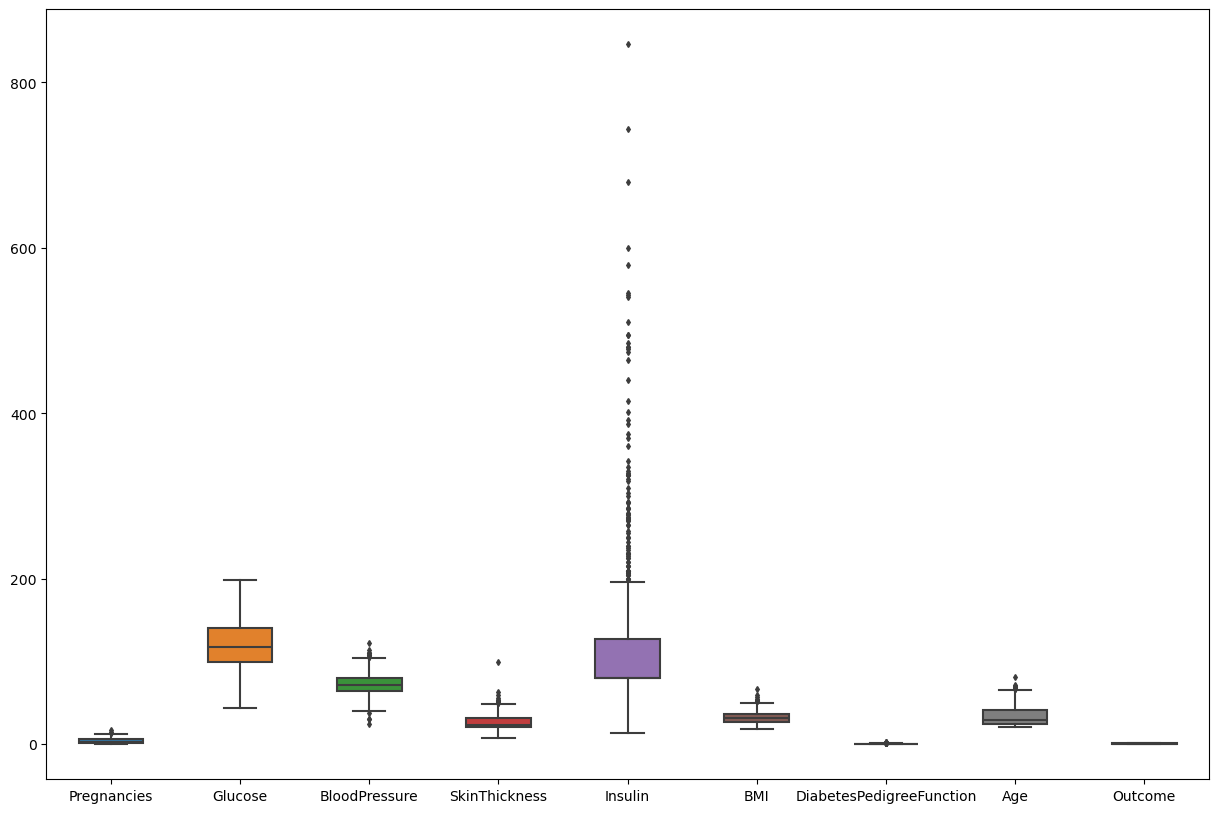

In [12]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

# Removing Outlier

### Calculate Q1 and Q3

In [13]:
Q1=np.percentile(data,25)
Q3=np.percentile(data,75)

In [14]:
Q1,Q3

(1.0, 74.0)

### Calculating IQR

In [15]:
IQR=Q3-Q1

In [16]:
IQR

73.0

### Determine the Boundaries 

In [17]:
Lower_fence=Q1-1.5*(IQR)
Higher_fence=Q1+1.5*(IQR)

In [18]:
Lower_fence,Higher_fence

(-108.5, 110.5)

### Removing Outlier

In [19]:
data_clean = data[~((data < Lower_fence) | (data > Higher_fence)).any(axis=1)]

In [20]:
print("Original Data:", data)
print("Filtered Data:", data_clean)

Original Data:      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0             

## Save Dataset

In [21]:
data_clean.to_csv('diabetes_clean.csv', index=False)

## Dependent And Independent Variable

In [22]:
X=data_clean.drop(columns=['Outcome'])
y=data_clean['Outcome']

## Train And Split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
X_train.shape,X_test.shape

((203, 8), (68, 8))

In [25]:
import pickle

## Standard Scaling_Standarization

In [26]:
def scaler_Standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    ## Saving the model
    
    file=open('standarScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [27]:
X_train_scaled,X_test_scaled=scaler_Standard(X_train,X_test)

In [28]:
X_train_scaled

array([[-0.43300542, -0.7180131 , -1.69582269, ..., -0.05344977,
         2.1005546 , -0.96096759],
       [-0.43300542, -1.45539923, -0.47074361, ..., -0.15898235,
        -0.21949858,  0.33809847],
       [-0.74034843,  0.67482737, -1.69582269, ..., -0.98816689,
         0.38573268, -0.41969006],
       ...,
       [-0.43300542, -0.47221772, -0.02398626, ..., -0.27959101,
         1.34401552, -0.52794557],
       [-0.43300542,  1.24834992,  0.92934676, ..., -0.56603658,
        -0.6501439 ,  2.39495307],
       [-0.74034843, -1.7831264 ,  0.75433546, ...,  0.36868054,
        -0.01775483, -0.96096759]])

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg=LogisticRegression()

In [31]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

# Hyperparemeter Tunning

### Grid_Search Cross_Validation

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Parameter Grid

In [34]:
parameters={'penalty'  :['l1','l2'],
           'C'         :np.logspace(-3,3,7),
           'solver'    :['newton-cg','lbfgs','liblinear'],}

In [35]:
logreg=LogisticRegression()
clf=GridSearchCV(logreg,
                 param_grid=parameters,
                 scoring='accuracy',
                 cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [36]:
clf.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
clf.best_score_

0.8871428571428572

## Prediction 

In [38]:
y_pred=clf.predict(X_test_scaled)

In [39]:
conf_mat=confusion_matrix(y_test,y_pred)

In [40]:
conf_mat

array([[59,  0],
       [ 9,  0]], dtype=int64)

In [41]:
TP=conf_mat[0][0]
FP=conf_mat[0][1]
FN=conf_mat[1][0]
TN=conf_mat[1][1]

In [42]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)

In [43]:
Accuracy

0.8676470588235294

In [44]:
Precision=TP/(TP+FP)

In [45]:
Precision

1.0

In [46]:
Recall=TP/(TP+FN)

In [47]:
Recall

0.8676470588235294

In [48]:
F1_score=2*(Recall*Precision)/(Recall+Precision)

In [49]:
F1_score

0.9291338582677166

In [50]:
import pickle

In [51]:
file=open('Made_For_Prediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()